In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import plotly.graph_objects as go
import plotly.express as px
from pandas import Series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
%matplotlib inline

In [2]:
print(os.getcwd())
os.chdir('/Users/liuyang/Desktop/Springboard_Capstone3/Data') 
print(os.getcwd())

/Users/liuyang/Desktop/Springboard_Capstone3/Notebook
/Users/liuyang/Desktop/Springboard_Capstone3/Data


In [3]:
df = pd.read_csv('train.csv')

In [4]:
# me_1 = pd.read_csv('model_eval_1_to_100.csv')
# me_2 = pd.read_csv('model_eval_101_to_200.csv')
# me_3 = pd.read_csv('model_eval_201_to_300.csv')
# me_4 = pd.read_csv('model_eval_301_to_400.csv')
# me_5 = pd.read_csv('model_eval_401_to_500.csv')
# me_6 =  pd.read_csv('model_eval_501_to_600.csv')
# me_7 =  pd.read_csv('model_eval_601_to_700.csv')
# me_8 =  pd.read_csv('model_eval_701_to_800.csv')
# me_9 =  pd.read_csv('model_eval_801_to_900.csv')
# me_10 =pd.read_csv('model_eval_901_to_1000.csv')
# me_11 =pd.read_csv('model_eval_1001_to_1100.csv')
# me_12 =pd.read_csv('model_eval_1101_to_1115.csv')

In [5]:
# me_all = pd.concat([me_1, me_2, me_3, me_4, me_5, me_6, me_7, me_8, me_9, me_10, me_11, me_12], axis=0).reset_index(drop=True)

In [6]:
# me_all['Store_id'] = np.arange(1,1116)

In [7]:
# # swtich columns
# newcolumns =['Store_id', 'MAE_AutoArima', 'WAPE_AutoArima', 'MAE_MeanMethod', 'WAPE_MeanMethod']
# me_all = me_all.reindex(columns=newcolumns)

In [8]:
# # save file
# me_all.to_csv('Model Evaluation for all Stoer.csv', index=False)

In [9]:
model_eval = pd.read_csv('Model Evaluation for all Stoer.csv')

In [10]:
model_eval

,Store_id,MAE_AutoArima,WAPE_AutoArima,MAE_MeanMethod,WAPE_MeanMethod
0,1,1666.636158,0.000036,3125.029762,0.000067
1,2,2980.725542,0.000064,5552.750000,0.000119
2,3,3225.279324,0.000069,6567.875000,0.000141
3,4,4297.064194,0.000092,6714.369048,0.000144
4,5,3485.932482,0.000075,5243.625000,0.000113
...,...,...,...,...,...
1110,1111,1542.693553,0.000033,5114.273810,0.000110
1111,1112,3187.204165,0.000068,10030.482143,0.000215
1112,1113,3952.001019,0.000085,4846.125000,0.000104
1113,1114,12413.270595,0.000267,16651.591270,0.000358


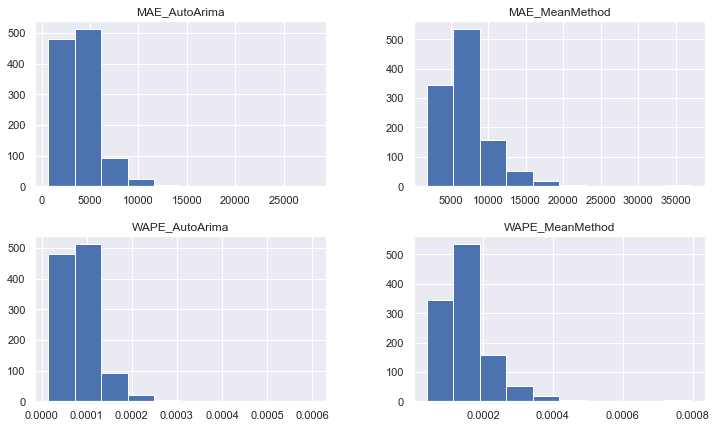

In [11]:
# plot evaluation result histogram for all store 

plt.rcParams['figure.figsize'] = (12, 7)
model_eval.drop('Store_id', axis=1).hist()
plt.show()

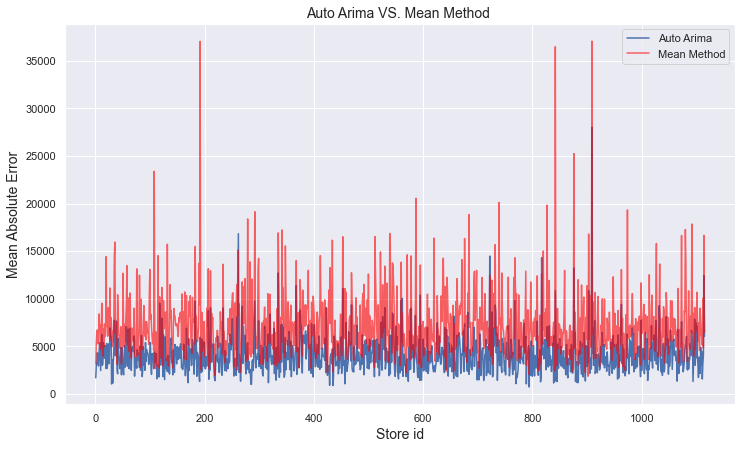

In [12]:
plt.plot(model_eval.Store_id, model_eval.MAE_AutoArima, label='Auto Arima')
plt.plot(model_eval.Store_id, model_eval.MAE_MeanMethod, label='Mean Method',color='red', alpha=0.6)
plt.title('Auto Arima VS. Mean Method ', fontsize=14)
plt.xlabel('Store id', fontsize=14)
plt.ylabel('Mean Absolute Error', fontsize=14)
plt.legend()
plt.show()

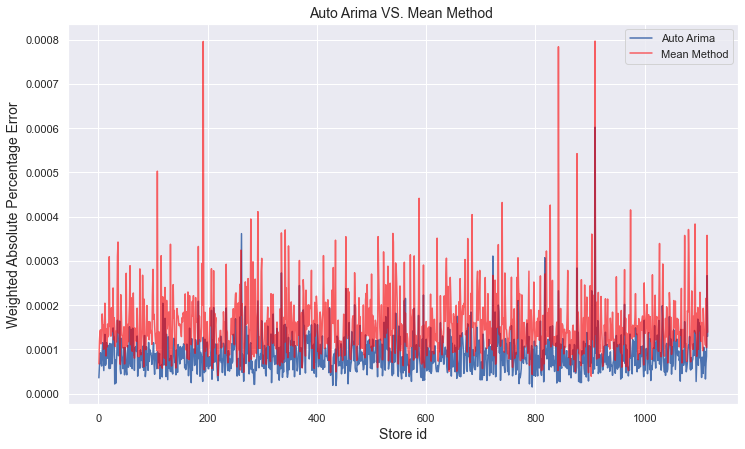

In [13]:
plt.plot(model_eval.Store_id, model_eval.WAPE_AutoArima, label='Auto Arima')
plt.plot(model_eval.Store_id, model_eval.WAPE_MeanMethod, label='Mean Method',color='red', alpha=0.6)
plt.title('Auto Arima VS. Mean Method ', fontsize=14)
plt.xlabel('Store id', fontsize=14)
plt.ylabel('Weighted Absolute Percentage Error', fontsize=14)
plt.legend()
plt.show()

In [14]:
model_eval.drop('Store_id', axis=1).describe()

,MAE_AutoArima,WAPE_AutoArima,MAE_MeanMethod,WAPE_MeanMethod
count,1115.000000,1115.000000,1115.000000,1115.000000
mean,4084.199939,0.000088,7143.064259,0.000153
std,2026.267425,0.000044,3455.717816,0.000074
min,700.806205,0.000015,1835.168651,0.000039
25%,2762.168609,0.000059,5028.680556,0.000108
50%,3703.111710,0.000080,6458.500000,0.000139
75%,4996.341265,0.000107,8279.050595,0.000178
max,28028.290703,0.000602,37089.093254,0.000797


### we can see the the result from 1115 stores that auto arima model outperformed mean method overall and in different percentile.

In [15]:
# autoarima WAPE / mean method WAPE: 

model_eval.drop('Store_id', axis=1).describe()['WAPE_AutoArima']/model_eval.drop('Store_id', axis=1).describe()['WAPE_MeanMethod']

count    1.000000
mean     0.571771
std      0.586352
min      0.381876
25%      0.549283
50%      0.573370
75%      0.603492
max      0.755702
dtype: float64

## Compare the Best and Worst 10 MAE Results Between Auto Arima and Meand Method 

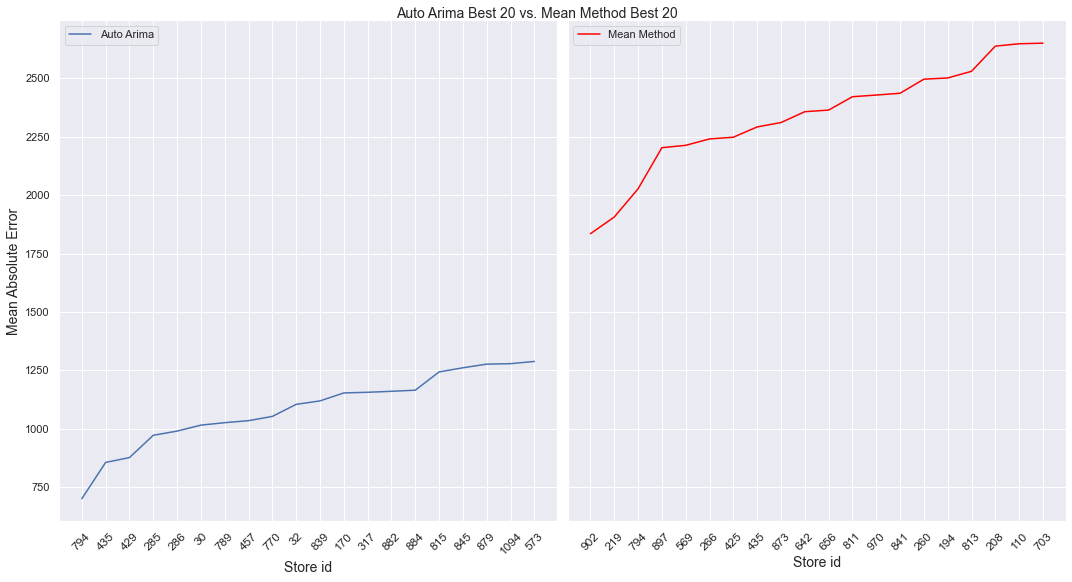

In [16]:

fig, axs =plt.subplots(1,2, sharey=True, figsize=(15, 8))

axs[0].plot( model_eval.nsmallest(20, 'MAE_AutoArima').Store_id.astype('str'),
          model_eval.MAE_AutoArima.nsmallest(20),  label='Auto Arima')

axs[1].plot( model_eval.nsmallest(20, 'MAE_MeanMethod').Store_id.astype('str'),
          model_eval.MAE_MeanMethod.nsmallest(20), label='Mean Method', color='red')


axs[0].set_xlabel('Store id', fontsize=14)
axs[0].set_xticklabels(model_eval.nsmallest(20, 'MAE_AutoArima').Store_id.astype('str'),
                       rotation=45,fontsize=12)
axs[1].set_xlabel('Store id', fontsize=14)
axs[1].set_xticklabels(model_eval.nsmallest(20, 'MAE_MeanMethod').Store_id.astype('str'),
                       rotation=45,fontsize=12)


axs[0].set_ylabel('Mean Absolute Error', fontsize=14)

axs[0].legend(loc='upper left')
axs[1].legend()

plt.suptitle('Auto Arima Best 20 vs. Mean Method Best 20', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()

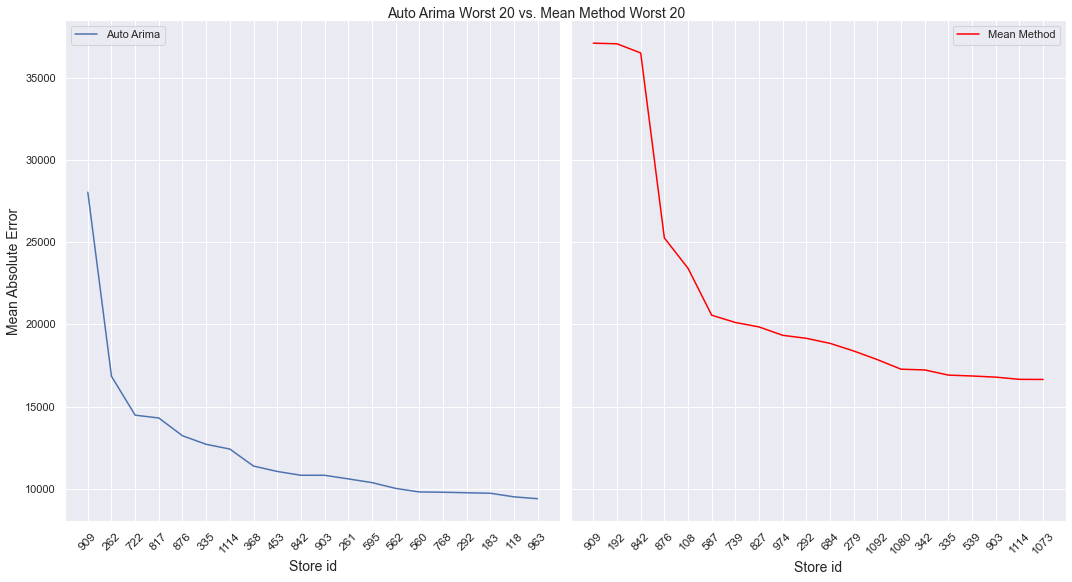

In [17]:

fig, axs =plt.subplots(1,2, sharey=True, figsize=(15, 8))

axs[0].plot( model_eval.nlargest(20, 'MAE_AutoArima').Store_id.astype('str'),
          model_eval.MAE_AutoArima.nlargest(20),  label='Auto Arima')

axs[1].plot( model_eval.nlargest(20, 'MAE_MeanMethod').Store_id.astype('str'),
          model_eval.MAE_MeanMethod.nlargest(20), label='Mean Method', color='red')


axs[0].set_xlabel('Store id', fontsize=14)
axs[0].set_xticklabels(model_eval.nlargest(20, 'MAE_AutoArima').Store_id.astype('str'),
                       rotation=45,fontsize=12)
axs[1].set_xlabel('Store id', fontsize=14)
axs[1].set_xticklabels(model_eval.nlargest(20, 'MAE_MeanMethod').Store_id.astype('str'),
                       rotation=45,fontsize=12)


axs[0].set_ylabel('Mean Absolute Error', fontsize=14)
axs[0].legend(loc='upper left')
axs[1].legend()

plt.suptitle('Auto Arima Worst 20 vs. Mean Method Worst 20', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()

## Compare the Middel MAE Result between Auto Arima and Mean Method (Ranking: 500 ~ 529 )

In [18]:
mae_autorima_best500_529=model_eval.sort_values('MAE_AutoArima', ascending=True).reset_index(drop=True).loc[500:529]
mae_autorima_best500_529


,Store_id,MAE_AutoArima,WAPE_AutoArima,MAE_MeanMethod,WAPE_MeanMethod
500,78,3491.060296,0.000075,4084.500000,0.000088
501,836,3501.530545,0.000075,6008.500000,0.000129
502,943,3502.274935,0.000075,4706.125000,0.000101
503,413,3509.387500,0.000075,9333.019841,0.000200
504,420,3509.875000,0.000075,9874.367063,0.000212
505,617,3517.333938,0.000076,5648.388889,0.000121
506,738,3519.079986,0.000076,5712.250000,0.000123
507,748,3535.151283,0.000076,5856.375000,0.000126
508,896,3538.280643,0.000076,4447.307540,0.000096
509,934,3545.600737,0.000076,4944.625000,0.000106


In [19]:
mae_meanmethod_best500_529=model_eval.sort_values('MAE_MeanMethod', ascending=True).reset_index(drop=True).loc[500:529]
mae_meanmethod_best500_529

,Store_id,MAE_AutoArima,WAPE_AutoArima,MAE_MeanMethod,WAPE_MeanMethod
500,19,5079.910149,0.000109,6171.250000,0.000133
501,43,4051.136261,0.000087,6171.625000,0.000133
502,487,4127.150025,0.000089,6173.875000,0.000133
503,11,5003.225365,0.000107,6175.170635,0.000133
504,808,4004.924664,0.000086,6177.722222,0.000133
505,964,3179.744458,0.000068,6180.000000,0.000133
506,246,3417.630736,0.000073,6187.125000,0.000133
507,672,4033.213004,0.000087,6193.500000,0.000133
508,734,4287.315020,0.000092,6200.250000,0.000133
509,324,3973.587303,0.000085,6201.250000,0.000133


# Plot the Result

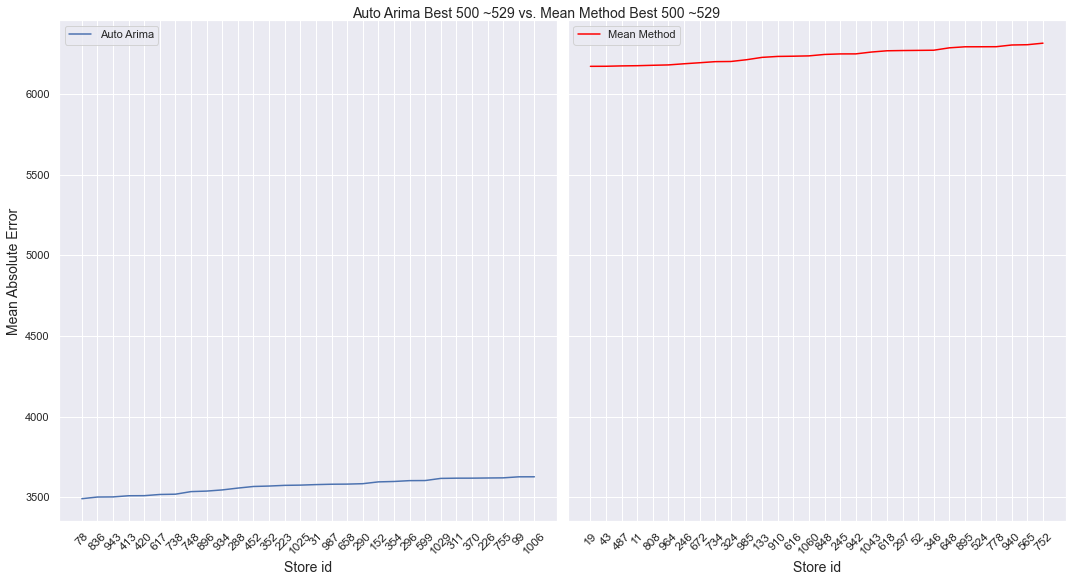

In [20]:
fig, axs =plt.subplots(1,2, sharey=True, figsize=(15, 8))

axs[0].plot(mae_autorima_best500_529.Store_id.astype('str'),
          mae_autorima_best500_529.MAE_AutoArima,  label='Auto Arima')

axs[1].plot(mae_meanmethod_best500_529.Store_id.astype('str'),
          mae_meanmethod_best500_529.MAE_MeanMethod, label='Mean Method', color='red')


axs[0].set_xlabel('Store id', fontsize=14)
axs[0].set_xticklabels(mae_autorima_best500_529.Store_id.astype('str'),
                       rotation=45,fontsize=12)
axs[1].set_xlabel('Store id', fontsize=14)
axs[1].set_xticklabels(mae_meanmethod_best500_529.Store_id.astype('str'),
                       rotation=45,fontsize=12)


axs[0].set_ylabel('Mean Absolute Error', fontsize=14)

axs[0].legend(loc='upper left')
axs[1].legend()

plt.suptitle('Auto Arima Best 500 ~529 vs. Mean Method Best 500 ~529', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()